In [1]:
from annotation_parser import parseAnnotation
from score_parser import parseScore
from common import TAVERNVERSIONS
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from music21.converter import parse as m21parse
pd.set_option('display.max_rows', 6000)

In [2]:
def getAlignmentDataFrame(a, s):
    alignmentdf = pd.concat([a.measure, s.measure], axis=1, keys=['annotationMeasure', 'scoreMeasure'])
    alignmentdf['misalignment'] = (alignmentdf.annotationMeasure != alignmentdf.scoreMeasure)
    return alignmentdf

In [3]:
aPath = "When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op014_No2/1/analysis.txt" 
sPath = "AlignedBPS/bps_10_01.mxl"

a = parseAnnotation(aPath)
s = parseScore(sPath)
alignmentdf = getAlignmentDataFrame(a, s)

In [4]:
a = m21parse(aPath, format="romantext")
s = m21parse(sPath)
# a.show('xml')
# s.chordify().show('xml')

In [5]:
alignmentdf.head()

,annotationMeasure,scoreMeasure,misalignment
offset,,,
0.00,0.0,0.0,False
0.25,0.0,0.0,False
0.50,0.0,0.0,False
0.75,0.0,0.0,False
1.00,1.0,1.0,False


First misalignment at:
Empty DataFrame
Columns: [annotationMeasure, scoreMeasure, misalignment]
Index: []
Alignment Score:  0.0


<AxesSubplot:xlabel='offset', ylabel='annotationMeasure'>

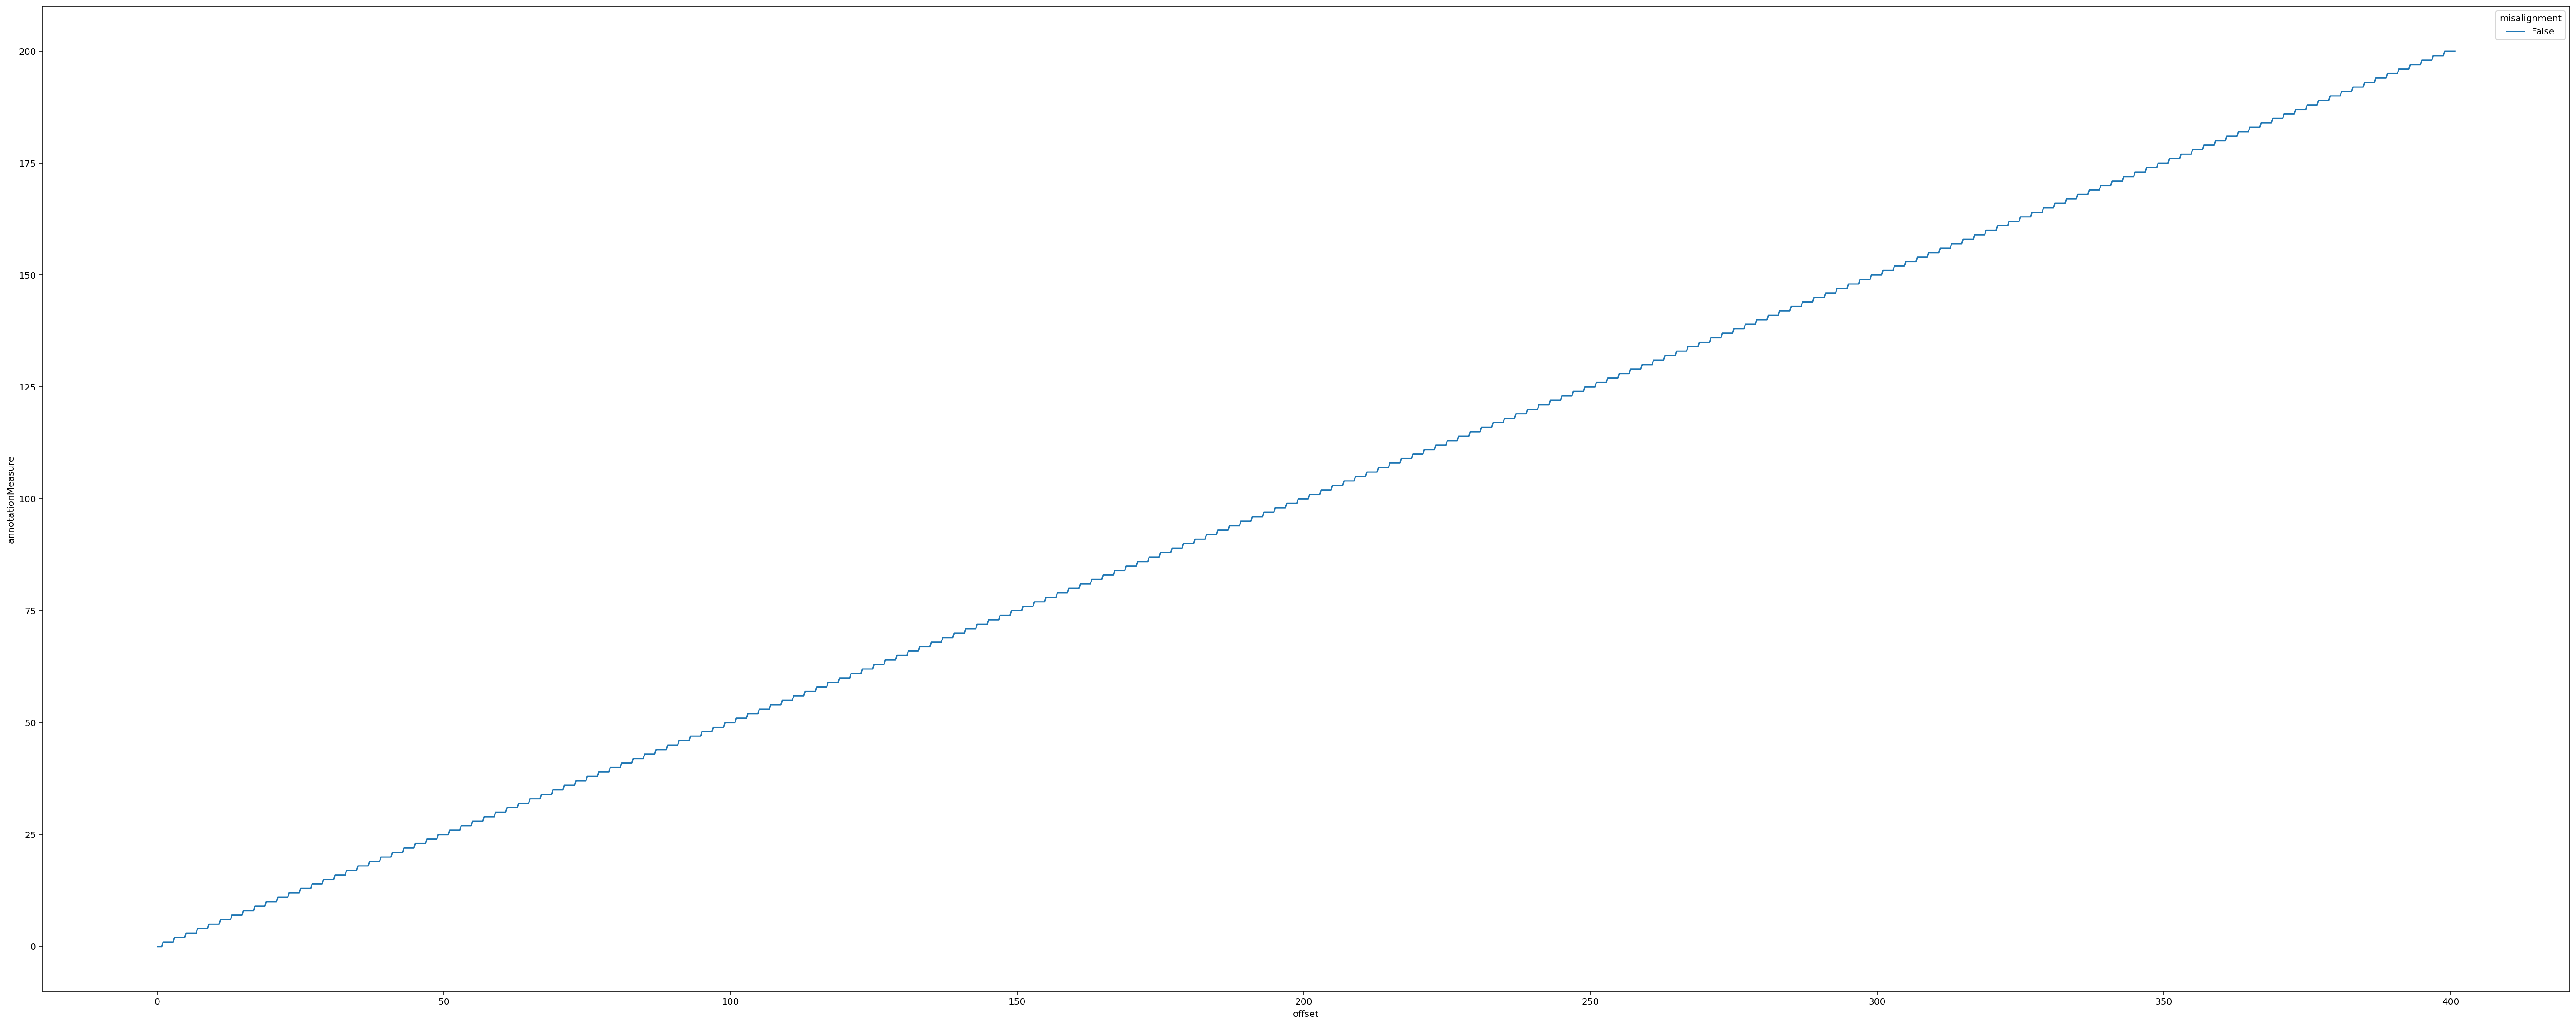

In [6]:
print('First misalignment at:')
print(alignmentdf[alignmentdf.misalignment].head(1))
print("Alignment Score: ", alignmentdf.misalignment.mean())
plt.figure(figsize=(50, 20))
sns.lineplot(x='offset', y='annotationMeasure', hue="misalignment", style="misalignment", data=alignmentdf)